In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred

### Ideas

I am not so sure percentage increase is what you want. Although this is in "thousands" a % increase from 2 --> 5 is greater than 1000 --> 1005
 - We need to get data on the total amount of people in the labor force
 
**Workflow Proposal**

$\frac{Occ_t}{LF_t}$ = % of people working in that industry out of the total labor force

 - $Occ_t$ = # of people employed in this industry at time $t$
 - $LF_t$ = # of people in the labor force at time $t$

Then, per 100k people --> % of people working in that industry * 100,000 (or * 100, it doesn't matter)

---

Which occupations have had the largest % increase over a certain time period?
 - Plot these top gainers 
 
Which occupations have had the largest % decrease over a certain time period?
 - Plot these top losers

Top occupations by % increase vs occupations by top % decrease
 - Plot these 

Filter occupations by wealth creation

In [42]:
fred = Fred(api_key = 'fb26df2e7851dcdd5267db1cd0abb74f')

In [43]:
lf = fred.get_series('CLF16OV')

In [44]:
lf = pd.DataFrame(lf)
lf = lf.rename(columns={0: 'LaborForce'})
lf.index.rename('Year', inplace=True)

In [45]:
labor = pd.read_csv('/Users/gabestechschulte/Downloads/labormarket.csv')
labor = labor.rename(columns={'Unnamed: 0': 'Year'})
labor['Year'] = pd.to_datetime(labor['Year'])
labor.set_index('Year', inplace=True)

In [46]:
labor = pd.merge(labor, lf, on='Year')
labor.tail()
yearly = labor.resample('A').last()
melt = yearly.reset_index().melt(id_vars = 'Year')

In [53]:
def plotter(df, occups=list, visual=None):
    
    melt = df.reset_index().melt(id_vars = 'Year')
    
    if visual == 'line' or visual == 'Line':
        sub = melt[melt.variable.isin(occups)]
        #plt.figure(figsize=(12, 9))
        #sns.lineplot('Year', 'value', data = sub, hue = 'variable')
        fig = px.line(sub, x="Year", y="value", color='variable',
                     width = 1250, height = 600)
        fig.show()
    #elif visual == 'bar' or visual == 'Bar':
    #    sns.barplot(x = )
    else:
        print('Try Again')

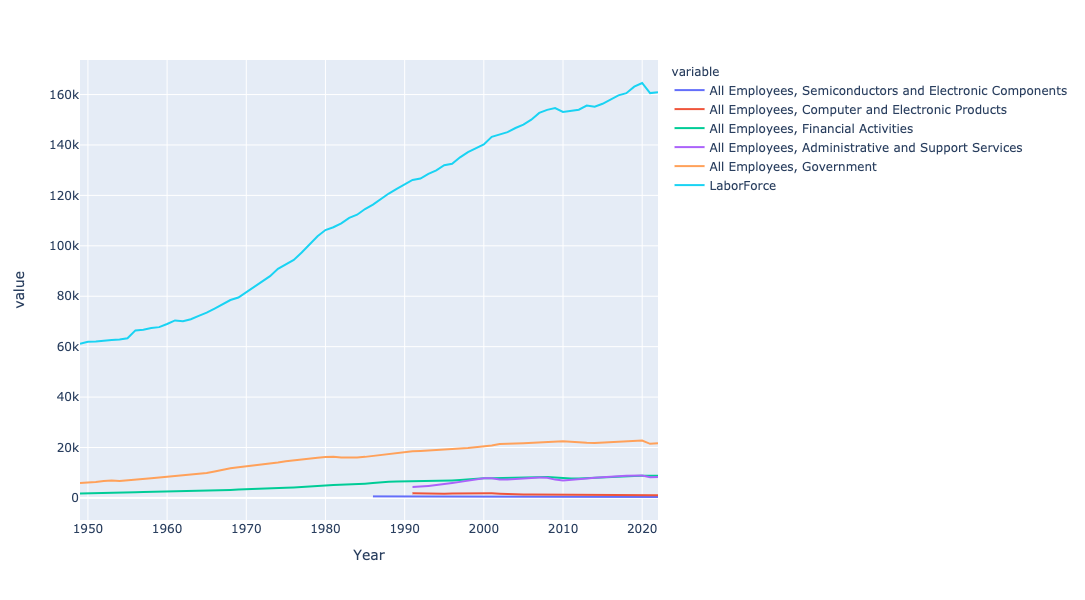

In [55]:
occs = ['All Employees, Financial Activities',
        'All Employees, Government',
        'All Employees, Administrative and Support Services',
        'All Employees, Computer and Electronic Products',
        'All Employees, Semiconductors and Electronic Components',
        'LaborForce']

plotter(yearly, occs, 'line')

In [49]:
# As a proportion of the total civilian labor force
percents = yearly.apply(lambda x: x / yearly.LaborForce)

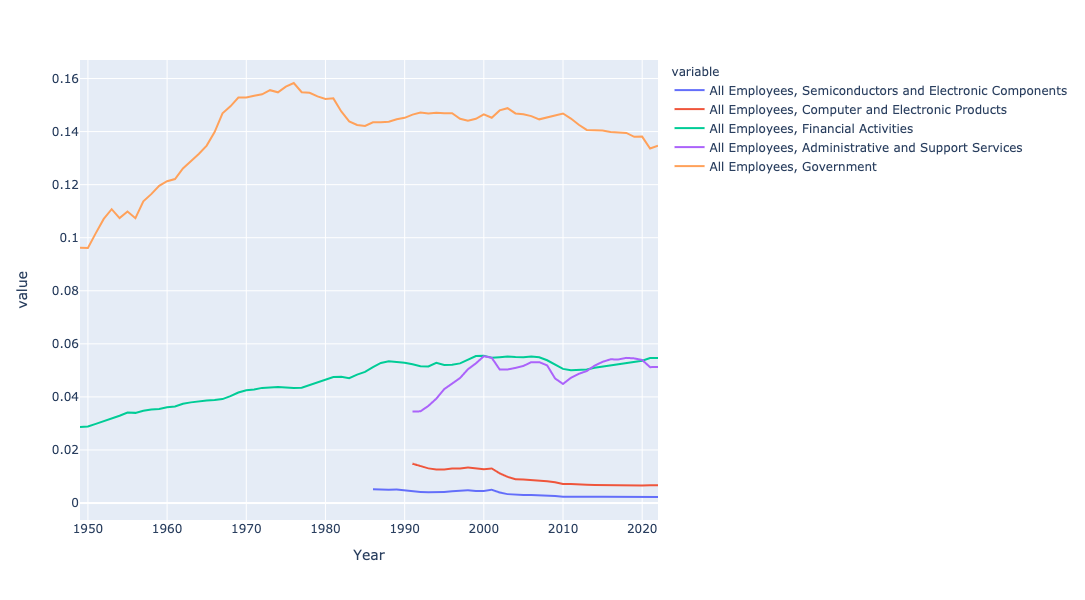

In [50]:
# As a proportion of the civilian labor force
plotter(percents, occs, 'line')

In [41]:
# Per 100,000 people in the labor force
# Since the underlying is "in thousands" it doesn't make a difference 
# whether it is *100,000 or *100
per100 = percents.apply(lambda x: x*100000)

In [ ]:
# As a proportion of the labor force per 100k people
plotter(per100, occs)

In [12]:
# Still in decimal format
percents100 = per100.pct_change()

In [ ]:
percents100.describe()

In [ ]:
plotter(percents100, occs)

In [89]:
# Which occupations represent the majority of the labor force as of 2020-12-31?
end2020 = percents[percents.index == '2020-12-31']
top20 = end2020.T.nlargest(20, '2020-12-31')
topoccs = [occ for occ in top20.index]

In [91]:
topoccs[3:-1]

['All Employees, Private Service-Providing',
 'All Employees, Trade, Transportation, and Utilities',
 'All Employees, Education and Health Services',
 'All Employees, Government',
 'All Employees, Professional and Business Services',
 'All Employees, Goods-Producing',
 'All Employees, Health Care and Social Assistance',
 'All Employees, Health Care',
 'All Employees, Retail Trade',
 'All Employees, Local Government',
 'All Employees, Leisure and Hospitality',
 'All Employees, Manufacturing',
 'All Employees, Accommodation and Food Services',
 'All Employees, Food Services and Drinking Places',
 'All Employees, Professional and Technical Services',
 'All Employees, Financial Activities']

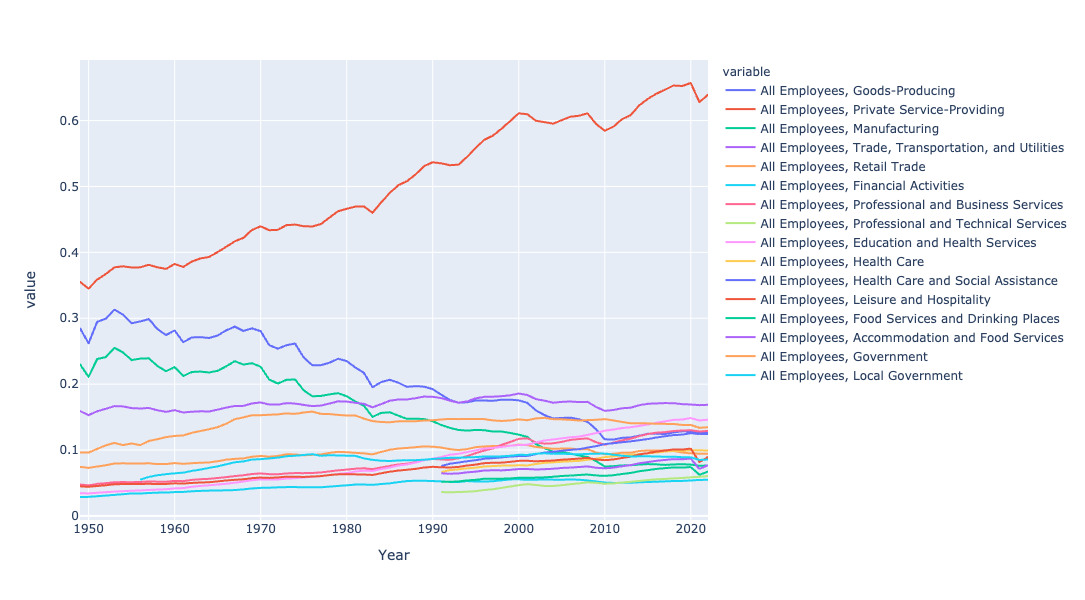

In [95]:
plotter(percents, topoccs[3:-1], 'line')